<a href="https://colab.research.google.com/github/meefs/art/blob/master/Torchdreams_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install  torch-dreams**

instructions from Nerdy Rodent - https://www.youtube.com/watch?v=gXfu2jUvHmQ

pip install

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-dreams imageio imageio-ffmpeg matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:18tcmalloc: large alloc 1147494400 bytes == 0x563a4b8d4000 @  0x7f3da5229615 0x563a126bb4cc 0x563a1279b47a 0x563a126be2ed 0x563a127afe1d 0x563a12731e99 0x563a1272c9ee 0x563a126bfbda 0x563a12731d00 0x563a1272c9ee 0x563a126bfbda 0x563a1272e737 0x563a127b0c66 0x563a1272ddaf 0x563a127b0c66 0x563a1272ddaf 0x563a127b0c66 0x563a1272ddaf 0x563a126c0039 0x563a12703409 0x563a126bec52 0x563a12731c25 0x563a1272c9ee 0x563a126bfbda 0x563a1272e737 0x563a1272c9ee 0x563a126bfbda 0x563a1272d915 0x563a126bfafa 0x563a1272dc0d 0x563a1272c9ee
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:15tcmalloc: large alloc 1434370048 bytes == 0x563a8ff2a000 @  0x7f3da5229615 0x563a126bb4cc 0x563a1279b47a 0x563a126be2ed 0x563a127afe1d 0x563a12731e99 0x563a1272c9ee 0x563a126bfbda 0x563a12731d00 0x563a1272c9ee 0x563a126bfbda 0x563a1272e737 0x563a127b0c66 0x563a1272dd

Create a directory to save scripts & images

In [3]:
!mkdir torch-dreams ## create /content/torch-dreams

!cd torch-dreams

!pwd ##print the current working directory

Some examples...
 

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

100%|██████████| 120/120 [00:04<00:00, 28.66it/s]


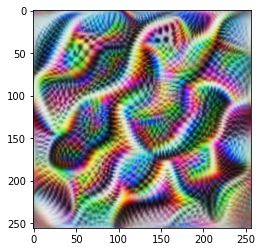

In [4]:
import matplotlib.pyplot as plt
import torchvision.models as models
from torch_dreams.dreamer import dreamer

model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda')

# Print the model
print(model)

image_param = dreamy_boi.render(
    layers = [model.Mixed_5c],
)

plt.imshow(image_param)
plt.show()


Not so minimal example...


In [ ]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda', quiet = False)

image_param = dreamy_boi.render(
    layers = [model.Mixed_5b],
    width = 256,
    height = 256,
    iters = 150,
    lr = 9e-3,
    rotate_degrees = 15,
    scale_max = 1.2,
    scale_min =  0.5,
    translate_x = 0.2,
    translate_y = 0.2,
    custom_func = None,
    weight_decay = 1e-2,
    grad_clip = 1.,
)

plt.imshow(image_param)
plt.show()


Visualizing individual channels

100%|██████████| 120/120 [00:03<00:00, 34.41it/s]


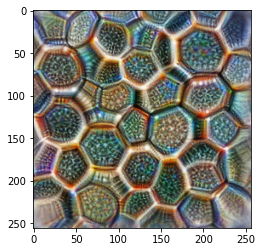

In [9]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda')

layers_to_use = [model.Mixed_6b.branch1x1.conv]

def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

my_custom_func = make_custom_func(layer_number= 0, channel_number = 119)

image_param = dreamy_boi.render(
    layers = layers_to_use,
    custom_func = my_custom_func,
)
plt.imshow(image_param)
plt.show()


**Caricatures**


In [1]:
model = models.googlenet(pretrained = True)
dreamy_boi = dreamer(model = model, quiet= False, device= 'cuda')

image_param = dreamy_boi.caricature(
    input_tensor = image_tensor, 
    layers = [model.inception4c],   ## feel free to append more layers for more interesting caricatures 
    power= 1.2,                     ## higher -> more "exaggerated" features
)

plt.imshow(image_param)
plt.show()


NameError: ignored